In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Es 2

In [ ]:
# Given parameters
alpha = 10
beta = 1
tau1 = 10  # minutes
tau2 = 25  # minutes
w = 0.6  # Probability of tau1

num_samples = 100000

# Lists to store values
X_realised = []
T_realised = []
XT_realised = []

for _ in range(num_samples):
    # Step 1: Generate mu from Gamma(alpha, beta)
    mu = stats.gamma.rvs(alpha, scale=1/beta)
    
    # Step 2: Generate X from Poisson(mu)
    X = stats.poisson.rvs(mu)
    
    # Step 3: Generate tau using bernoulli
    binom_rv = stats.binom.rvs(n=1, p=w)  # Bernoulli trial
    tau = tau1 if binom_rv == 1 else tau2
    # Step 3: Generate T
    T = np.random.exponential(scale=1/tau)
    
    # Store results
    X_realised.append(X)
    T_realised.append(T)
    XT_realised.append(X * T) 

# Convert to numpy arrays for further analysis]
X_realised = np.array(X_realised)
T_realised = np.array(T_realised)
XT_realised = np.array(XT_realised)

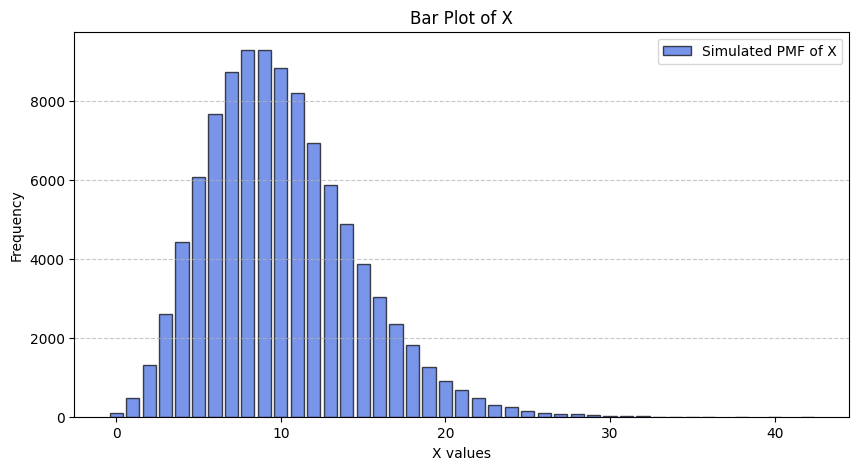

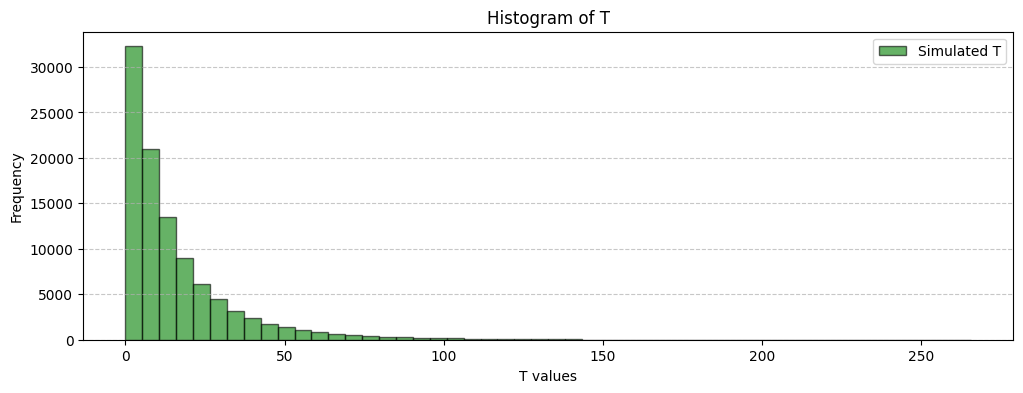

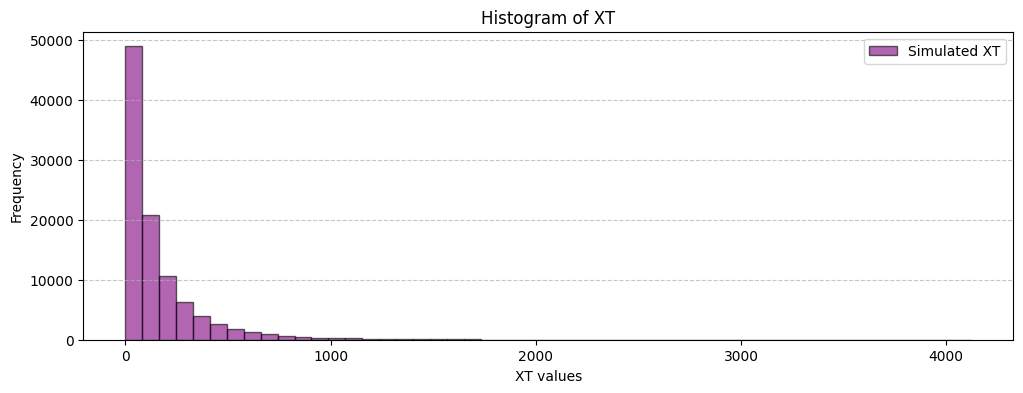

In [ ]:


# Get unique values and their counts for X
X_unique, X_counts = np.unique(X_realised, return_counts=True)

# Bar Plot for Discrete X
plt.figure(figsize=(10, 5))
plt.bar(X_unique, X_counts, color='royalblue', edgecolor='black', alpha=0.7, label='Simulated PMF of X')
plt.xlabel('X values')
plt.ylabel('Frequency')
plt.title('Bar Plot of X')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Histogram for Continuous T
plt.figure(figsize=(12, 4))
plt.hist(T_realised, bins=50, density=False, alpha=0.6, color='green', edgecolor='black', label='Simulated T')
plt.xlabel('T values')
plt.ylabel('Frequency')
plt.title('Histogram of T')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram for Continuous XT
plt.figure(figsize=(12, 4))
plt.hist(XT_realised, bins=50, density=False, alpha=0.6, color='purple', edgecolor='black', label='Simulated XT')
plt.xlabel('XT values')
plt.ylabel('Frequency')
plt.title('Histogram of XT')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Es 3

In [98]:
count=0
for i in XT_realised:
    if i/60>5: #divided by 60 since i is in minutes
        count+=1
p_XTbigger5=count/num_samples
print(f"Probability that XT is bigger than 5: {p_XTbigger5}")

Probability that XT is bigger than 5: 0.15116


# Es 4

In [112]:
# Compute confidence intervals for XT_realised
interval_90 = np.quantile(XT_realised, [0.05, 0.95])
interval_95 = np.quantile(XT_realised, [0.025, 0.975])
interval_99 = np.quantile(XT_realised, [0.005, 0.995])

# Print results
print(f"90% confidence interval: {interval_90}")
print(f"95% confidence interval: {interval_95}")
print(f"99% confidence interval: {interval_99}")


90% confidence interval: [  5.19402706 572.61223642]
95% confidence interval: [  2.51788796 777.14946614]
99% confidence interval: [4.08816707e-01 1.33227295e+03]


# Es 5 and 6

In [ ]:
# Function to compute cost based on minutes
def compute_cost(minutes):
    hours = minutes / 60  # Convert minutes to hours
    N = np.ceil(hours)  # Round up to the nearest whole number (to do such that the cost of 2 hours and some min is the same as the one of 3 hours)
    fixed_cost = 100 * N
    variable_cost = 30 * (N * (N - 1) / 2)  # Arithmetic series formula
    return fixed_cost + variable_cost

#Compute cost for an array of minutes
cost_realised = np.array([compute_cost(m) for m in XT_realised])

# Compute expectation and variance
Exp_cost = np.mean(cost_realised)
Var_cost = np.var(cost_realised, ddof=1)  #ddof=1 for sample variance

# Print results
print(f"Expected Cost: {Exp_cost:.4f}")
print(f"Variance of Cost: {Var_cost:.4f}")



Expected Cost: 621.2217
Variance of Cost: 2559087.5533


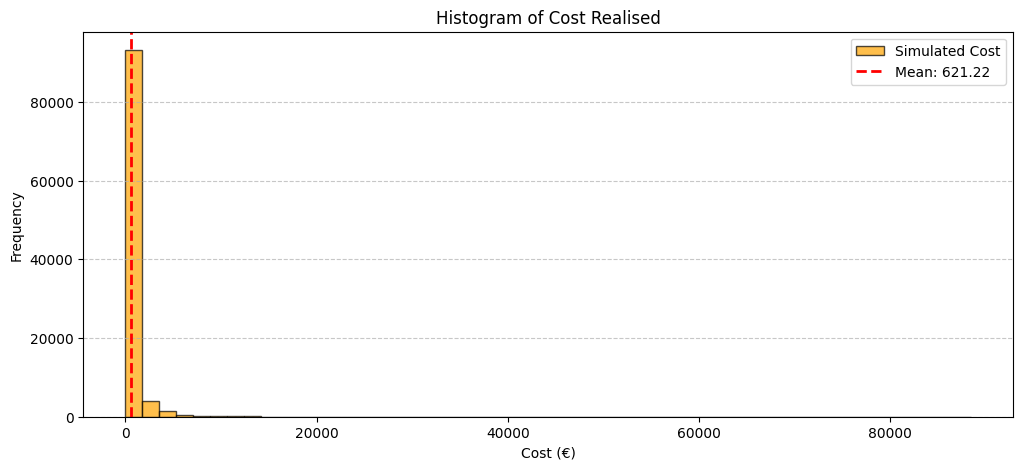

In [105]:
# Plot histogram for cost samples
plt.figure(figsize=(12, 5))
plt.hist(cost_realised, bins=50, density=False, alpha=0.7, color='orange', edgecolor='black', label='Simulated Cost')
plt.axvline(np.mean(cost_realised), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(cost_realised):.2f}')
plt.xlabel('Cost (€)')
plt.ylabel('Frequency')
plt.title('Histogram of Cost Realised')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()